# Introduction

## Problem

#### We need to develope a machine learning model to predict if a person has diabet disease. Before that, we need to analyse the data by using feature enginerring steps then finally we can develope and use our machine learning model.

## DataSet

This data based on the Pima Indian Women who is more than 21 years old that lives in the Phoenix city in USA which is the largest 5th city in the Arizona State.

Outcome is our output which is 0 or 1. <br>
* 0 represents negative of the test
* 1 represenets the positive of the test.

### Features
1. Pregnancies: The number of preg.
2. Glucose
3. Blood Pressure: low blood pressure (mm Hg)
4. SkinThickness
5. Insulin
6. DiabetesPedigreeFunction: This function caclulates the probability that you have diabetes by lookng your ancestors
7. BMI
8. Age
9. Outcome : 0 or 1

## Libraries

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
# import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [153]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

def load_application_train():
    data = pd.read_csv("diabetes.csv")
    return data

In [154]:
df = load_application_train()

# Task 1: Data Analysis

### Step 1

* Observe the data

In [155]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 2

### Step 2

* Detect the numerical and categorical features and analyze them

In [156]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    This function will give categorical numerical and cardinal features in the dataset.
    Not: In categorical features it will give the numerical ones but that can be categorized too.

    Parameters
    ------
        dataframe: dataframe
                The dataframe that is wanted to extract categorical and numerical features in general.
        cat_th: int, optional
                The threshold for a feature can be considered as a categorical type.
        car_th: int, optinal
                The threshold for categoric but cardinal features.

    Returns
    ------
        cat_cols: list
                categorical feature list
        num_cols: list
                numerical feature list
        cat_but_car: list
                categorical but cardinal list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total_features

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [157]:
cat_cols,num_cols,cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [158]:
cat_cols

['Outcome']

In [159]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Step 3
* Observe the data based on the Outcome Value

In [160]:
for num_var in num_cols:
    grouped_mean = df.groupby('Outcome')[num_var].mean()
    print(f"Mean {num_var} for Outcome:")
    print(grouped_mean)
    print()

Mean Pregnancies for Outcome:
Outcome
0   3.298
1   4.866
Name: Pregnancies, dtype: float64

Mean Glucose for Outcome:
Outcome
0   109.980
1   141.257
Name: Glucose, dtype: float64

Mean BloodPressure for Outcome:
Outcome
0   68.184
1   70.825
Name: BloodPressure, dtype: float64

Mean SkinThickness for Outcome:
Outcome
0   19.664
1   22.164
Name: SkinThickness, dtype: float64

Mean Insulin for Outcome:
Outcome
0    68.792
1   100.336
Name: Insulin, dtype: float64

Mean BMI for Outcome:
Outcome
0   30.304
1   35.143
Name: BMI, dtype: float64

Mean DiabetesPedigreeFunction for Outcome:
Outcome
0   0.430
1   0.550
Name: DiabetesPedigreeFunction, dtype: float64

Mean Age for Outcome:
Outcome
0   31.190
1   37.067
Name: Age, dtype: float64



### Step 4
* Make outlier observation

In [161]:
def outlier_detection():
    for num_var in num_cols:
        q1 = df[num_var].quantile(0.25)
        q3 = df[num_var].quantile(0.75)

        iqr = q3 - q1
        up = q3 + 1.5 * iqr
        low = q1 - 1.5 * iqr

        print(num_var)
        print(df[(df[num_var] < low) | (df[num_var] > up)].any(axis=None))

        print("-----------")
        

In [162]:
outlier_detection()

Pregnancies
True
-----------
Glucose
True
-----------
BloodPressure
True
-----------
SkinThickness
True
-----------
Insulin
True
-----------
BMI
True
-----------
DiabetesPedigreeFunction
True
-----------
Age
True
-----------


In [163]:
def get_outliers():
    for num_var in num_cols:
        q1 = df[num_var].quantile(0.25)
        q3 = df[num_var].quantile(0.75)

        iqr = q3 - q1
        up = q3 + 1.5 * iqr
        low = q1 - 1.5 * iqr

        print(num_var)
        print(df[(df[num_var] < low) | (df[num_var] > up)][num_var])

        print(df[(df[num_var] < low) | (df[num_var] > up)].index)
        print("-----------")

In [164]:
get_outliers()

Pregnancies
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
Int64Index([88, 159, 298, 455], dtype='int64')
-----------
Glucose
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
Int64Index([75, 182, 342, 349, 502], dtype='int64')
-----------
BloodPressure
7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BloodPressure, dtype: int64
Int64Index([7, 15, 18, 43, 49, 60, 78, 81, 84, 106, 125, 172, 177, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430, 435, 453, 468, 484, 494, 522, 533, 53

### Step 5
* Missing value observation

In [165]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### **Note**: There is no missing value in this dataset but you can see from the outlier analysis that there are a lot of 0 values in blood pressure and glucose we can treat them as a missing values

### Step 6
* Make correlation analysis

In [166]:
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# If you want to focus on the correlation with the target variable
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
print("\nCorrelation with Target Variable:")
print(correlation_with_target)

Correlation Matrix:
                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction    Age  Outcome
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074 0.018                    -0.034  0.544    0.222
Glucose                         0.129    1.000          0.153          0.057    0.331 0.221                     0.137  0.264    0.467
BloodPressure                   0.141    0.153          1.000          0.207    0.089 0.282                     0.041  0.240    0.065
SkinThickness                  -0.082    0.057          0.207          1.000    0.437 0.393                     0.184 -0.114    0.075
Insulin                        -0.074    0.331          0.089          0.437    1.000 0.198                     0.185 -0.042    0.131
BMI                             0.018    0.221          0.282          0.393    0.198 1.000                     0.141  0.036    0.293
DiabetesPedigreeFunction       -0.034    0

### Step 7: Base Model Creation
* We will create a base model on our preprocessed data to compare after we have solved issues in our data such as missing values, outliers, standaraziation etc. 

In [167]:
y = df["Outcome"]
X = df.drop("Outcome",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [168]:
def evaluate_model(y_pred,y_test):
    print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
    print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
    print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
    print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
    print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
evaluate_model(y_pred,y_test)

Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


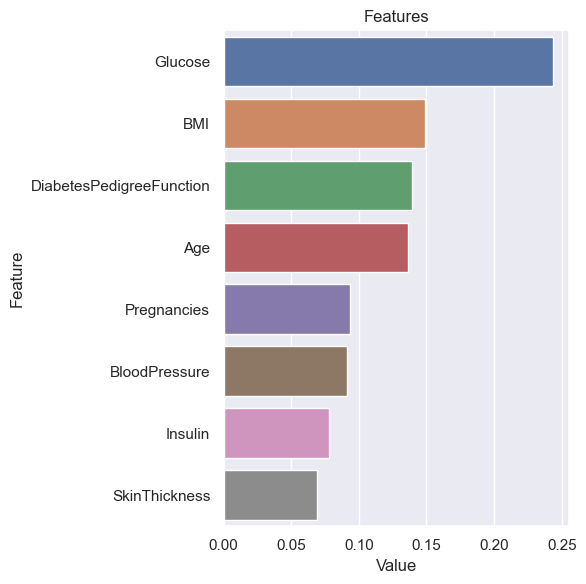

In [169]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(6, 6))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

# Task 2: Feature Engineering

### Step 1:
* Make the necessery steps for outliers and missing values.

##### First we are going to solve missing values problems because in our data we do not have missin values. However, some features in our data except pregnancy count can not be 0 for any human being. So, we are going to make them None values. Then use solve missing values problem.

In [170]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]

for col in zero_columns:
    df[col] = df[col].replace(0, None)

In [171]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* Now as we can see we have some missing values for 5 of our features.

In [172]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
missing_features = missing_values_table(df, True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [173]:
def fill_missing_values(missing_features,dataframe):
    for feature in missing_features:
        dataframe[feature].fillna(dataframe[feature].mean(),inplace=True)
    return dataframe

fill_missing_values(missing_features,df)
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [174]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def fix_outlier_values(dataframe,numerical_features):
    for feature in numerical_features:
        replace_with_thresholds(dataframe,feature)


In [175]:
fix_outlier_values(df,num_cols)

In [176]:
get_outliers()

Pregnancies
Series([], Name: Pregnancies, dtype: float64)
Int64Index([], dtype='int64')
-----------
Glucose
Series([], Name: Glucose, dtype: float64)
Int64Index([], dtype='int64')
-----------
BloodPressure
Series([], Name: BloodPressure, dtype: float64)
Int64Index([], dtype='int64')
-----------
SkinThickness
Series([], Name: SkinThickness, dtype: float64)
Int64Index([], dtype='int64')
-----------
Insulin
Series([], Name: Insulin, dtype: float64)
Int64Index([], dtype='int64')
-----------
BMI
Series([], Name: BMI, dtype: float64)
Int64Index([], dtype='int64')
-----------
DiabetesPedigreeFunction
Series([], Name: DiabetesPedigreeFunction, dtype: float64)
Int64Index([], dtype='int64')
-----------
Age
Series([], Name: Age, dtype: float64)
Int64Index([], dtype='int64')
-----------


* As we can see all numerical features' outliers index list is empty we can move on with out process.

In [177]:
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome
0        6.000  148.000         72.000         35.000  155.548 33.600                     0.627 50.000        1
1        1.000   85.000         66.000         29.000  155.548 26.600                     0.351 31.000        0
2        8.000  183.000         64.000         29.153  155.548 23.300                     0.672 32.000        1
3        1.000   89.000         66.000         23.000   

### Step 2: Create new variables
* This part is the feature engineering part that we create new variables from the old variables.

#### Categorize Age
* We are creating two categories of women by age. The youngest women in the data is 21 so it is our lowest value. Because of that we will say for between 21-50 we will categorize it mature if a woman is older than 50 then we are categorizing them as senior.

In [178]:
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

In [179]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,senior
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,mature
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,mature
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,mature
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature


#### Categorize BMI

* As we can search and find from the internet there are four categories for BMI values. You can check it from the website and from the image below.<br>

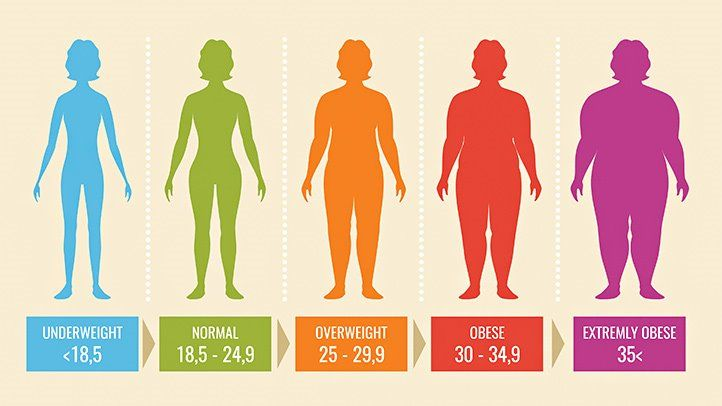
<br>
https://www.everydayhealth.com/diet-nutrition/bmi/bmi-adults-yours-healthy-not-how-can-you-lose-weight/

In [180]:
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9,100],labels=["Underweight", "Healthy", "Overweight", "Obese","ExtemelyObese"])

In [181]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,senior,Obese
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,mature,Overweight
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,mature,Healthy
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,mature,Overweight
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature,ExtemelyObese


#### Categorize Glucose
* We will categorize glucose for the normal people, for the people who is not in the diabetes section but it is a warning sign for them to be in diabetes section and for sure for people who are in the diabetes section.
* Also do not forget our **minimum value for glucose is 44** and **maximum value is 199**
* You can check the how we decide these values from the image and from the link below:
<br>
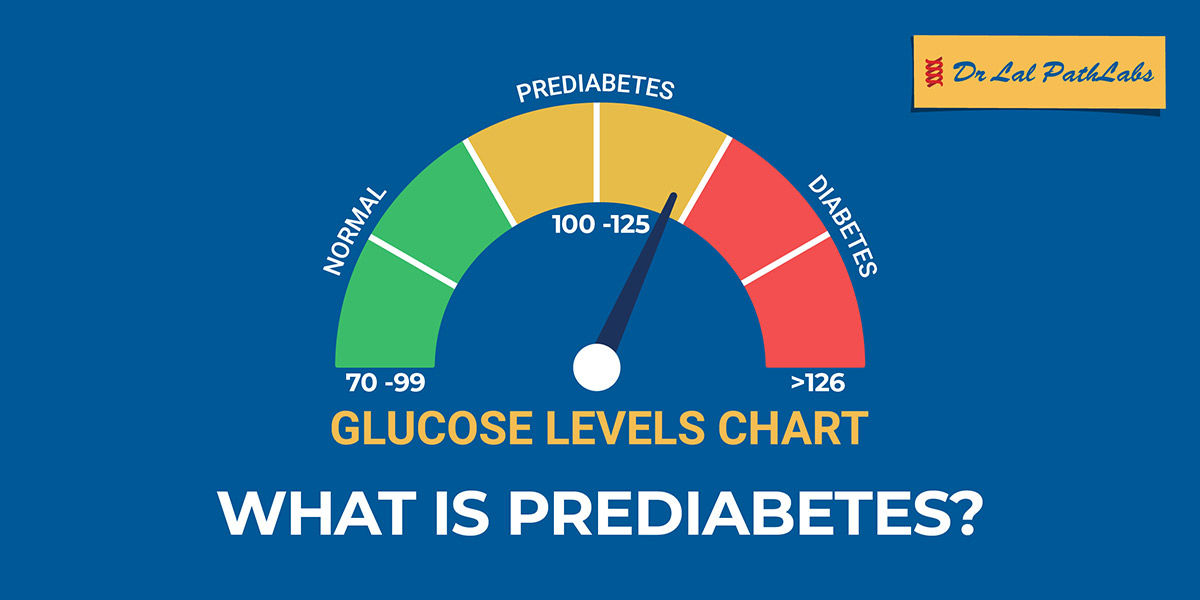
<br>
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.lalpathlabs.com%2Fblog%2Fprediabetes%2F&psig=AOvVaw2JtPkdheMqsvOh4DY18Sg-&ust=1693513625710000&source=images&cd=vfe&opi=89978449&ved=0CAQQjB1qFwoTCPi0uoKchYEDFQAAAAAdAAAAABAk

In [182]:
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[43, 100, 126, 200], labels=["Normal", "Prediabetes", "Diabetes"])

In [183]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,senior,Obese,Diabetes
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,mature,Overweight,Normal
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,mature,Healthy,Diabetes
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,mature,Overweight,Normal
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature,ExtemelyObese,Diabetes


#### Categorize Age and BMI
* In this section we are just concating the BMI categories with Age categories and from those we are creating new categories.

In [184]:
# UNDERWEIGHT
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweight_mature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
# HEALTHY
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthy_mature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthy_senior"
# OVERWEIGHT
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweight_mature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweight_senior"
# OBESE
df.loc[((df["BMI"] >= 30) & (df["BMI"] < 35)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obese_mature"
df.loc[((df["BMI"] >= 30) & (df["BMI"] < 35)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obese_senior"
# EXTREMELYOBESE
df.loc[((df["BMI"] >= 35) ) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "extremelyobese_mature"
df.loc[((df["BMI"] >= 35) ) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "extremelyobese_senior"

In [185]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,senior,Obese,Diabetes,obese_senior
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,mature,Overweight,Normal,overweight_mature
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,mature,Healthy,Diabetes,healthy_mature
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,mature,Overweight,Normal,overweight_mature
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature,ExtemelyObese,Diabetes,extremelyobese_mature


#### Categorize Glucose and Age
* Glucose can be differentiate upon human age. So we are going to concatanate them because we believe we can extract good information from here.

In [186]:
# Normal Glucose Level (normal)
df.loc[(df["Glucose"] < 100) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normal_mature"
df.loc[(df["Glucose"] < 100) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normal_senior"

# Prediabetese Glucose Level (hidden)
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] < 126)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hidden_mature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] < 126)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hidden_senior"

# Diabetese Glucose Level (high)
df.loc[(df["Glucose"] > 126) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "high_mature"
df.loc[(df["Glucose"] > 126) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "high_senior"

In [187]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,senior,Obese,Diabetes,obese_senior,high_senior
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,mature,Overweight,Normal,overweight_mature,normal_mature
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,mature,Healthy,Diabetes,healthy_mature,high_mature
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,mature,Overweight,Normal,overweight_mature,normal_mature
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature,ExtemelyObese,Diabetes,extremelyobese_mature,high_mature


#### Categorize Insulin
* The normal value for insulin is between 16 and 166

In [188]:
df["NEW_INSULIN_SCORE"] = pd.cut(x=df["Glucose"], bins=[0,16,166,207], labels=["Low","Normal", "High"])

In [189]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE
763,10.000,101.000,76.000,42.500,180.000,32.900,0.171,63.000,0,senior,Obese,Prediabetes,obese_senior,hidden_senior,Normal
764,2.000,122.000,70.000,27.000,155.548,36.800,0.340,27.000,0,mature,ExtemelyObese,Prediabetes,extremelyobese_mature,hidden_mature,Normal
765,5.000,121.000,72.000,23.000,112.000,26.200,0.245,30.000,0,mature,Overweight,Prediabetes,overweight_mature,hidden_mature,Normal
766,1.000,126.000,60.000,29.153,155.548,30.100,0.349,47.000,1,mature,Obese,Prediabetes,obese_mature,NaN,Normal
767,1.000,93.000,70.000,31.000,155.548,30.400,0.315,23.000,0,mature,Obese,Normal,obese_mature,normal_mature,Normal


* We know glucose and insulin are our top features so we wonder if it will work when we multiply them and create new feature.

In [190]:
df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]

In [191]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,senior,Obese,Diabetes,obese_senior,high_senior,Normal,23021.137
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,mature,Overweight,Normal,overweight_mature,normal_mature,Normal,13221.599
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,mature,Healthy,Diabetes,healthy_mature,high_mature,High,28465.325
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,mature,Overweight,Normal,overweight_mature,normal_mature,Normal,8366.000
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature,ExtemelyObese,Diabetes,extremelyobese_mature,high_mature,Normal,23016.000


* We will do the same process with glucose and pregnancies but pregnancie count may be 0 in our data if we multiply by zero it will not make sense when we create the new dataframe so we will add 1 to all pregnancy counts.

In [192]:
df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * (1+ df["Pregnancies"])

In [193]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,senior,Obese,Diabetes,obese_senior,high_senior,Normal,23021.137,1036.000
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,mature,Overweight,Normal,overweight_mature,normal_mature,Normal,13221.599,170.000
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,mature,Healthy,Diabetes,healthy_mature,high_mature,High,28465.325,1647.000
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,mature,Overweight,Normal,overweight_mature,normal_mature,Normal,8366.000,178.000
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature,ExtemelyObese,Diabetes,extremelyobese_mature,high_mature,Normal,23016.000,137.000


### Step 3: Encoding

* We have added 8 features (9 to 17) to our data frame after feature engineering section. Now we are going to use encoding method but first we need to get column types (numeric, categorical, cat_but_cardinal) again to undertand which encoding mehtods we are going to use for each column.

In [194]:
check_df(df)

##################### Shape #####################
(768, 17)
##################### Types #####################
Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                        int64
NEW_AGE_CAT                   object
NEW_BMI                     category
NEW_GLUCOSE                 category
NEW_AGE_BMI_NOM               object
NEW_AGE_GLUCOSE_NOM           object
NEW_INSULIN_SCORE           category
NEW_GLUCOSE*INSULIN          float64
NEW_GLUCOSE*PREGNANCIES      float64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome NEW_AGE_CAT        NEW_BMI NEW_GLUCOSE        NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM NEW_

/var/folders/nw/rdkcthhx4wbdkdh_dpcf30l40000gn/T/ipykernel_47049/3267247443.py:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [195]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 4


In [196]:
cat_cols

['NEW_AGE_CAT',
 'NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'Outcome',
 'NEW_BMI',
 'NEW_GLUCOSE',
 'NEW_INSULIN_SCORE']

In [197]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'NEW_GLUCOSE*INSULIN',
 'NEW_GLUCOSE*PREGNANCIES']

#### Label Encoding
* We are going to use Label Encoding method for columns that has binary data.

In [198]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [199]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['NEW_AGE_CAT']

In [200]:
for col in binary_cols:
    df = label_encoder(df, col)

In [201]:
df[binary_cols].head()

,NEW_AGE_CAT
0,1
1,0
2,0
3,0
4,0


#### One-Hot Encoding
* We are going to encode the columns that has more than 2 classes to categorize. Also do not forget to remove the TARGET column which is OUTCOME for us.

In [202]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Outcome"]]
cat_cols

['NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_BMI',
 'NEW_GLUCOSE',
 'NEW_INSULIN_SCORE']

In [203]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [204]:
# drop_first: to prevent unnecessary classes to create.
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [205]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_extremelyobese_senior,NEW_AGE_BMI_NOM_healthy_mature,NEW_AGE_BMI_NOM_healthy_senior,NEW_AGE_BMI_NOM_obese_mature,NEW_AGE_BMI_NOM_obese_senior,NEW_AGE_BMI_NOM_overweight_mature,NEW_AGE_BMI_NOM_overweight_senior,NEW_AGE_BMI_NOM_underweight_mature,NEW_AGE_GLUCOSE_NOM_hidden_senior,NEW_AGE_GLUCOSE_NOM_high_mature,NEW_AGE_GLUCOSE_NOM_high_senior,NEW_AGE_GLUCOSE_NOM_normal_mature,NEW_AGE_GLUCOSE_NOM_normal_senior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_BMI_ExtemelyObese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes,NEW_INSULIN_SCORE_Normal,NEW_INSULIN_SCORE_High
0,6.000,148.000,72.000,35.000,155.548,33.600,0.627,50.000,1,1,23021.137,1036.000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
1,1.000,85.000,66.000,29.000,155.548,26.600,0.351,31.000,0,0,13221.599,170.000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,8.000,183.000,64.000,29.153,155.548,23.300,0.672,32.000,1,0,28465.325,1647.000,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,0,8366.000,178.000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,0,23016.000,137.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0


#### Standart Scaling
* For numerical values we are using standart scale to make mean to 0 and standart deviation to 1.

In [206]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'NEW_GLUCOSE*INSULIN',
 'NEW_GLUCOSE*PREGNANCIES']

In [209]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_extremelyobese_senior,NEW_AGE_BMI_NOM_healthy_mature,NEW_AGE_BMI_NOM_healthy_senior,NEW_AGE_BMI_NOM_obese_mature,NEW_AGE_BMI_NOM_obese_senior,NEW_AGE_BMI_NOM_overweight_mature,NEW_AGE_BMI_NOM_overweight_senior,NEW_AGE_BMI_NOM_underweight_mature,NEW_AGE_GLUCOSE_NOM_hidden_senior,NEW_AGE_GLUCOSE_NOM_high_mature,NEW_AGE_GLUCOSE_NOM_high_senior,NEW_AGE_GLUCOSE_NOM_normal_mature,NEW_AGE_GLUCOSE_NOM_normal_senior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_BMI_ExtemelyObese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes,NEW_INSULIN_SCORE_Normal,NEW_INSULIN_SCORE_High
0,0.647,0.865,-0.032,0.818,0.294,0.181,0.589,1.446,1,1,0.644,0.926,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
1,-0.849,-1.206,-0.546,0.012,0.294,-0.870,-0.378,-0.189,0,0,-0.615,-0.919,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1.246,2.016,-0.717,0.032,0.294,-1.365,0.747,-0.103,1,0,1.343,2.227,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,-0.849,-1.075,-0.546,-0.795,-1.265,-0.645,-1.023,-1.050,0,0,-1.238,-0.902,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,-1.148,0.503,-2.770,0.818,0.610,1.607,2.597,-0.017,1,0,0.643,-0.990,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0


In [208]:
df.shape

(768, 33)

In [210]:
y = df["Outcome"]
X = df.drop("Outcome",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [211]:
def evaluate_model(y_pred,y_test):
    print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
    print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
    print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
    print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
    print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
evaluate_model(y_pred,y_test)

Accuracy: 0.78
Recall: 0.718
Precision: 0.63
F1: 0.67
Auc: 0.77


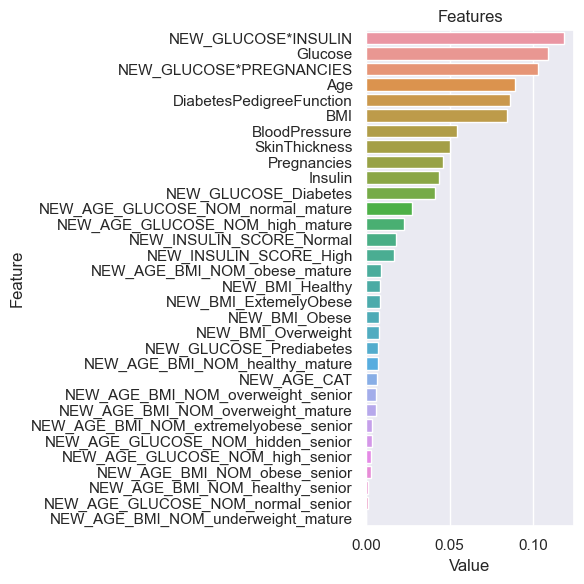

In [212]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(6, 6))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

# Result

* If you look at the first model accuracy which is 0.77 and last model accuracy which is 0.78. We can understand that Feature Engineering is an important part of the play in this game. We have used the same model but with added data from the previous data. As a result we have improved our model accuracy.

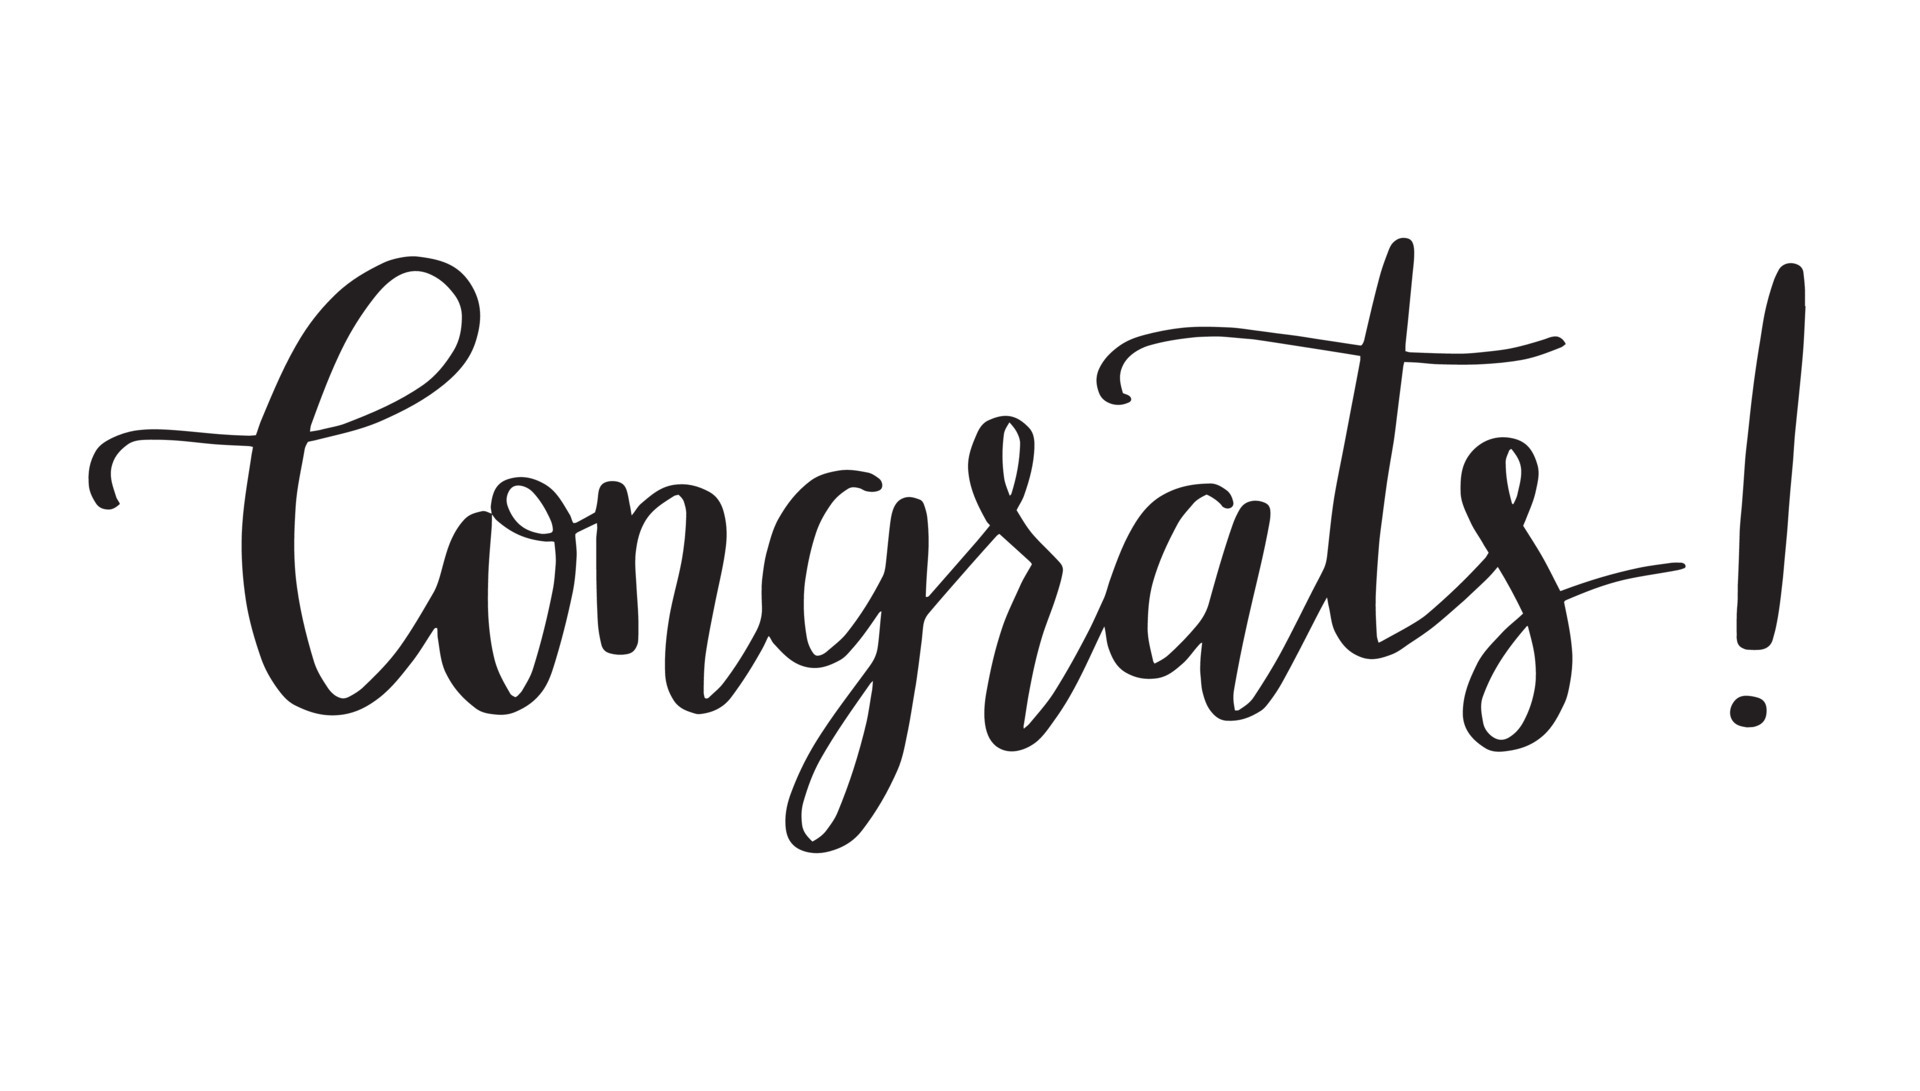